Optical flow demo Original: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html

In [1]:
import cv2
import numpy as np
from PIL import Image

In [ ]:
vid = cv2.VideoCapture('/content/vid.mp4')
ret, first_frame = vid.read()

prev_frame = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
prev_points = cv2.goodFeaturesToTrack(prev_frame, 100, mask = None, qualityLevel=0.5, blockSize=7, minDistance=7)

mask = np.zeros_like(first_frame)

# video is 30 frames per sec so 100 frames is ~3 sec
for i in range(100):
    ret, frame = vid.read()
    current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # first calculate Shi-Tomasi corner points, then track them with Lucas-Kanade optical flow
    current_point, status, error = cv2.calcOpticalFlowPyrLK(prev_frame, current_frame, prev_points, None)

    # select good points
    good_new = current_point[status==1] # 1 if found, else 0
    good_old = prev_points[status==1]

    # create mask of track points 
    for new,old in zip(good_new, good_old):
      a, b = new.ravel()
      c, d = old.ravel()
      mask = cv2.line(mask, (a,b),(c,d), [0,0, 255], 1) # make line from old points to new points

    # add mask to original image
    final_image = cv2.add(mask, frame)
    prev_frame = current_frame.copy()
    prev_points = good_new.reshape(-1,1,2)


Final Result Frame


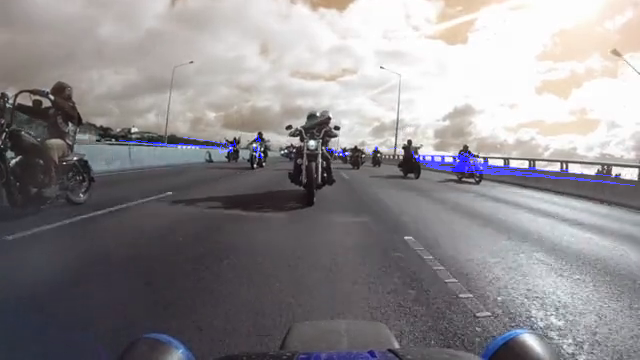

In [ ]:
print("Final Result Frame")
Image.fromarray(final_image)

Original/initial frame


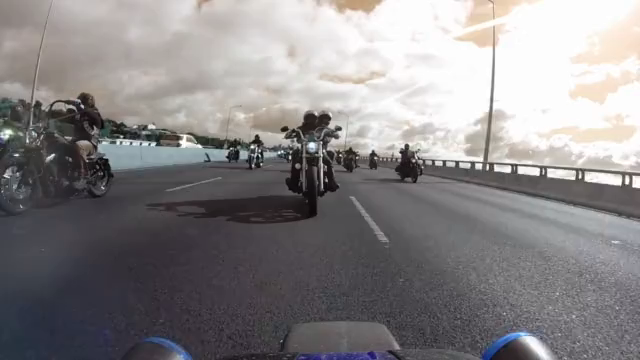

In [ ]:
print("Original/initial frame")
Image.fromarray(first_frame)